MIT License

Copyright (c) 2021 Chollette Olisah

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


In [2]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
#glucose and output data
data = pd.read_csv('poly-Nonzero.csv')
data = data.sort_values(by='Insulin', ascending=True)
print(data.shape)
data.head() 

(393, 2)


,Glucose,Insulin
226,180,14
319,68,15
390,88,16
293,99,18
48,83,18


In [4]:
from sklearn.model_selection import train_test_split
splitRatio = 0.2

train , test = train_test_split(data,test_size = splitRatio,random_state = 123)

X_train = train[[x for x in train.columns if x not in ["Insulin"]]]
y_train = train[["Insulin"]]
#y_train = label_binarize(y_train, classes=[0,1,2])

X_test  = test[[x for x in test.columns if x not in ["Insulin"]]]
y_test  = test[["Insulin"]]



In [5]:
y_train = y_train.to_numpy()
X_train = X_train.to_numpy()
y_test = y_test.to_numpy()
X_test = X_test.to_numpy()

In [6]:
polynomial_features2= PolynomialFeatures(degree=2)
polynomial_features7= PolynomialFeatures(degree=7)
polynomial_features12= PolynomialFeatures(degree=12)
polynomial_features17= PolynomialFeatures(degree=17)



In [7]:

x_poly2 = polynomial_features2.fit_transform(X_train)
t_poly2 = polynomial_features2.fit_transform(X_test)
model = LinearRegression()
model.fit(t_poly2, y_test)
y_poly_pred2 = model.predict(t_poly2)

"""

x_poly7 = polynomial_features7.fit_transform(X_train)
t_poly7 = polynomial_features7.fit_transform(X_test)
model = LinearRegression()
model.fit(t_poly7, y_test)
y_poly_pred7 = model.predict(t_poly7)

"""

"""
x_poly12 = polynomial_features12.fit_transform(X_train)
t_poly12 = polynomial_features12.fit_transform(X_test)
model = LinearRegression()
model.fit(t_poly12, y_test)
y_poly_pred12 = model.predict(t_poly12)

x_poly17 = polynomial_features17.fit_transform(X_train)
t_poly17 = polynomial_features17.fit_transform(X_test)
model = LinearRegression()
model.fit(t_poly17, y_test)
y_poly_pred17 = model.predict(t_poly17)
"""


'\nx_poly12 = polynomial_features12.fit_transform(X_train)\nt_poly12 = polynomial_features12.fit_transform(X_test)\nmodel = LinearRegression()\nmodel.fit(t_poly12, y_test)\ny_poly_pred12 = model.predict(t_poly12)\n\nx_poly17 = polynomial_features17.fit_transform(X_train)\nt_poly17 = polynomial_features17.fit_transform(X_test)\nmodel = LinearRegression()\nmodel.fit(t_poly17, y_test)\ny_poly_pred17 = model.predict(t_poly17)\n'

In [8]:
mse = mean_squared_error(y_test,y_poly_pred2)
print(mse)

6873.914807633459


In [10]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_poly_pred2)

56.02684694954641

82.90907554443879
0.43911224526388404


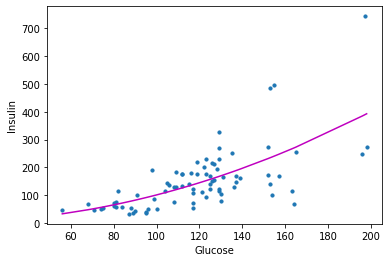

In [11]:
rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred2))
r2 = r2_score(y_test,y_poly_pred2)
print(rmse)
print(r2)

plt.scatter(X_test, y_test, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test,y_poly_pred2), key=sort_axis)
X_test, y_poly_pred2 = zip(*sorted_zip)
plt.plot(X_test, y_poly_pred2, color='m')
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

In [64]:
""""
#fig, axes = plt.subplots(2,2)
# plot the 3 sets

plt.scatter(X_test, y_test, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip2 = sorted(zip(X_test,y_poly_pred2), key=sort_axis)
sorted_zip7 = sorted(zip(X_test,y_poly_pred7), key=sort_axis)
sorted_zip12 = sorted(zip(X_test,y_poly_pred12), key=sort_axis)
sorted_zip17 = sorted(zip(X_test,y_poly_pred17), key=sort_axis)
#sorted_zip18 = sorted(zip(X_test,y_poly_pred18), key=sort_axis)

X_test, y_poly_pred17 = zip(*sorted_zip7)

plt.plot(X_test, y_poly_pred17,label='7-degree')

plt.xlabel("Glucose")
plt.ylabel("Insulin")

plt.legend()

plt.show()

"""

'"\n#fig, axes = plt.subplots(2,2)\n# plot the 3 sets\n\nplt.scatter(X_test, y_test, s=10)\n# sort the values of x before line plot\nsort_axis = operator.itemgetter(0)\nsorted_zip2 = sorted(zip(X_test,y_poly_pred2), key=sort_axis)\nsorted_zip7 = sorted(zip(X_test,y_poly_pred7), key=sort_axis)\nsorted_zip12 = sorted(zip(X_test,y_poly_pred12), key=sort_axis)\nsorted_zip17 = sorted(zip(X_test,y_poly_pred17), key=sort_axis)\n#sorted_zip18 = sorted(zip(X_test,y_poly_pred18), key=sort_axis)\n\nX_test, y_poly_pred17 = zip(*sorted_zip7)\n\nplt.plot(X_test, y_poly_pred17,label=\'7-degree\')\n\nplt.xlabel("Glucose")\nplt.ylabel("Insulin")\n\nplt.legend()\n\nplt.show()\n\n'

In [65]:
"""
fig, axes = plt.subplots(2,2)
# plot the 3 sets
plt.plot(X_test, y_poly_pred2,label='2-degree')
plt.plot(X_test, y_poly_pred7,label='7-degree')
plt.plot(X_test, y_poly_pred12,label='12-degree')
plt.plot(X_test, y_poly_pred17,label='17-degree')


# one plot on each subplot
axes[0][0].scatter(x,y1)
axes[0][1].bar(x,y1)
axes[1][0].scatter(x,y2)
axes[1][1].plot(x,y2)

# you can set a legend for a single subplot
axes[1][1].legend(['plot 4'])
# call with no parameters
plt.legend()

plt.show()
"""

"\nfig, axes = plt.subplots(2,2)\n# plot the 3 sets\nplt.plot(X_test, y_poly_pred2,label='2-degree')\nplt.plot(X_test, y_poly_pred7,label='7-degree')\nplt.plot(X_test, y_poly_pred12,label='12-degree')\nplt.plot(X_test, y_poly_pred17,label='17-degree')\n\n\n# one plot on each subplot\naxes[0][0].scatter(x,y1)\naxes[0][1].bar(x,y1)\naxes[1][0].scatter(x,y2)\naxes[1][1].plot(x,y2)\n\n# you can set a legend for a single subplot\naxes[1][1].legend(['plot 4'])\n# call with no parameters\nplt.legend()\n\nplt.show()\n"

In [12]:
#new_df = pd.DataFrame([[141,44]])
new_df = pd.read_csv('poly-pred.csv',encoding='latin1')
new_df  = new_df[["Glucose"]]
new_df.head()

,Glucose
0,148
1,85
2,183
3,116
4,125


In [13]:
new_d = new_df.to_numpy()
newdf_poly = polynomial_features2.fit_transform(new_d)
# We predict the outcome
prediction = model.predict(newdf_poly)
prediction = prediction.astype(int)

In [14]:
new_df['Insulin'] = prediction
new_df.head()

,Glucose,Insulin
0,148,219
1,85,72
2,183,335
3,116,134
4,125,156


In [15]:
new_df.to_csv('pred-insulin-2.csv',index=False, header=True)